# Persistent homology for smartphone data analysis (pedestrian recognition)

In [227]:
import numpy as np
import pandas as pd
import pickle as pickle
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline

> ## <span style="color:blue">Question 1</span>: Loading Data

In [228]:
#path = "/Users/cloti/Desktop/MSc in Data Science/T1 2017/Geometric Methods/Final Project/PersistentHomology/data_acc_rot.dat"
path="/Users/yaguethiam/PersistentHomology/data_acc_rot.dat"
#path = '/Users/Melisande/Gudhi/2017-10-02-10-19-30_GUDHI_2.0.1.tar/Gudhi/PersistentHomology/data_acc_rot.dat'

In [229]:
f = open(path,"rb")
data = pickle.load(f,encoding='latin1')
f.close()

data_A = data[0]
data_B = data[1] 
data_C = data[2]
label = data[3]

### plot a sample of acceleration data

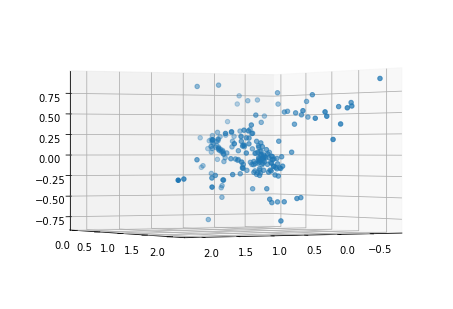

In [230]:
from mpl_toolkits.mplot3d import Axes3D
data_A_sample = data_A[0]
plt.subplots_adjust(bottom = 0.1)
fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=60,elev = 0)
ax.scatter(
    data_A_sample[:, 0], data_A_sample[:, 1],data_A_sample[:, 2], marker = 'o'
    )
plt.show()

> # <span style="color:blue">Question 2</span>:

__Compute and save the 0-dimensional and 1-dimensional persistence diagrams of the Rips filtrations and the alpha-shape filtrations built on top of each of the 300 point clouds in R3.__

In [231]:
import gudhi

### Average pairwise distance between two points for the 3 pedestrians

In [232]:
from scipy.spatial.distance import squareform, pdist

In [233]:
def computeMaxPairWiseDistance(points):
    matdist=squareform(pdist(points, 'euclidean'))
    sumD=[]
    for i in range(points.shape[0]):
        for j in range(i+1,points.shape[0]):
            sumD.append(matdist[i,j])
            
    npsumD=np.array(sumD)
    
    return (max(npsumD),min(npsumD),np.median(npsumD),np.mean(npsumD),np.std(npsumD))

In [234]:
def get_pedestrian_stats(pedes_id):  
    pedes_stats=np.zeros((100,5))
    if pedes_id=="A":
        data = data_A
    elif pedes_id=="B":
        data = data_B
    elif pedes_id=="C":
        data = data_C
    else:
        print("Invalid pedestrian ID, choose A, B or C")
        return(0)
    for i in range(100):
        stats=computeMaxPairWiseDistance(data[i])
        pedes_stats[i,0]=stats[0]
        pedes_stats[i,1]=stats[1]
        pedes_stats[i,2]=stats[2]
        pedes_stats[i,3]=stats[3]
        pedes_stats[i,4]=stats[4]
    pedestrian_stats=pd.DataFrame(pedes_stats,columns=['max_pairwise_distance','min_pairwise_distance',\
                                                           'median_pairwise_distance','mean_pairwise_distance','std_pairwise_distance'])
    return(pedes_stats, pedestrian_stats)


In [235]:
pedes_A_stats, pedestrian_A_stats = get_pedestrian_stats("A")
pedes_B_stats, pedestrian_B_stats = get_pedestrian_stats("B")
pedes_C_stats, pedestrian_C_stats = get_pedestrian_stats("C")

In [236]:
print("max A",np.amax(pedes_A_stats[:,0]))
print("min A", np.amin(pedes_A_stats[:,1]))
print("max B",np.amax(pedes_B_stats[:,0]))
print("min B", np.amin(pedes_B_stats[:,1]))
print("max C",np.amax(pedes_C_stats[:,0]))
print("min C", np.amin(pedes_C_stats[:,1]))

max A 3.1189965738631424
min A 0.003145985537156763
max B 4.11443915341593
min B 0.0009622338593086326
max C 4.575816373108742
min C 0.004078235525322162


In [237]:
pedestrian_A_stats

,max_pairwise_distance,min_pairwise_distance,median_pairwise_distance,mean_pairwise_distance,std_pairwise_distance
0,3.074729,0.015547,0.743386,0.794757,0.440863
1,2.899356,0.014363,0.677060,0.744717,0.434100
2,3.074729,0.015547,0.739156,0.791242,0.443478
3,2.584385,0.010270,0.694232,0.742513,0.400281
4,2.678923,0.009176,0.676241,0.730662,0.401748
5,2.717759,0.008491,0.644967,0.712770,0.414837
6,2.654506,0.015739,0.729615,0.771732,0.418423
7,3.118997,0.012076,0.704566,0.758827,0.420437
8,2.810768,0.010751,0.697458,0.740675,0.408821
9,2.708880,0.017089,0.745436,0.782410,0.424371


In [238]:
pedestrian_A_max_Dist=max(pedestrian_A_stats['max_pairwise_distance'])-np.mean(pedestrian_A_stats['std_pairwise_distance'])
pedestrian_B_max_Dist=max(pedestrian_B_stats['max_pairwise_distance'])-np.mean(pedestrian_B_stats['std_pairwise_distance'])
pedestrian_C_max_Dist=max(pedestrian_C_stats['max_pairwise_distance'])-np.mean(pedestrian_C_stats['std_pairwise_distance'])


### Selection of the max edge length for Rips complex filtration

In [239]:
maxEdgeLen=max(pedestrian_A_max_Dist,pedestrian_B_max_Dist,pedestrian_C_max_Dist)
print(maxEdgeLen)

3.950659020528408


## With Rips Filtration

### 0-dimensional persistence diagrams of the Rips filtrations

In order to draw the 0-dimensional persistence diagram of the Rips filtrations, we use \verb gudhi.RipsComplex on the 3D point cloud. 

In [242]:
def build_0_persistent_diag(dataset, maxEdgeLen=0.8):
    persist=[]
    for i in range(len(dataset)):
        rips = gudhi.RipsComplex(points=dataset[i],max_edge_length=maxEdgeLen)
        simplex_tree = rips.create_simplex_tree(max_dimension=1)
        diag = simplex_tree.persistence()
        persist.append(diag)
    return persist

> Compute the 0 persistent diagram for the 3 pedestrians 

In [243]:
diagA_0=build_0_persistent_diag(data_A,maxEdgeLen)
diagB_0=build_0_persistent_diag(data_B,maxEdgeLen)
diagC_0=build_0_persistent_diag(data_C,maxEdgeLen)

<module 'matplotlib.pyplot' from '/Users/yaguethiam/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

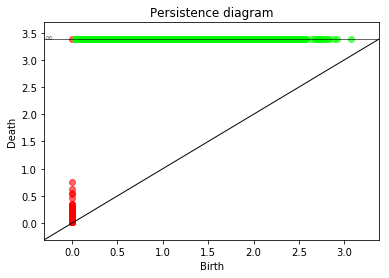

In [92]:
gudhi.plot_persistence_diagram(diagA_0[0])

### 1-dimensional persistence diagrams of the Rips filtrations

In [244]:
def build_1_persistent_diag(dataset, maxEdgeLen=0.8):
    persist=[]
    for i in range(len(dataset)):
        rips = gudhi.RipsComplex(points=dataset[i],max_edge_length=maxEdgeLen)
        simplex_tree = rips.create_simplex_tree(max_dimension=2)
        diag = simplex_tree.persistence()
        persist.append(diag)
    return persist

> Compute the 1 persistent diagram for the 3 pedestrians 

In [245]:
diagA_1=build_1_persistent_diag(data_A,maxEdgeLen)
diagB_1=build_1_persistent_diag(data_B,maxEdgeLen)
diagC_1=build_1_persistent_diag(data_C,maxEdgeLen)

<module 'matplotlib.pyplot' from '/Users/yaguethiam/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

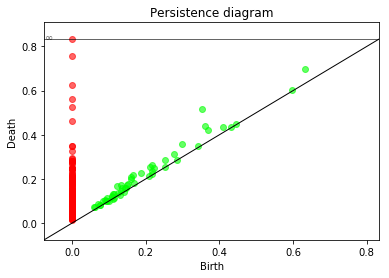

In [96]:
gudhi.plot_persistence_diagram(diagA_1[0])

diagA_1_outliers=build_1_persistent_diag(data_A_wo_outliers)
diagB_1_outliers=build_1_persistent_diag(data_B_wo_outliers)
diagC_1_outliers=build_1_persistent_diag(data_B_wo_outliers)

## With Alpha complex

In [246]:
def build_alphaComplex_diag(dataset,maxAlphaSquare=2.7**2):
    persist=[]
    for i in range(len(dataset)):
        alpha_complex = gudhi.AlphaComplex(points=dataset[i])
        simplex_tree = alpha_complex.create_simplex_tree(max_alpha_square=maxAlphaSquare)
        diag = simplex_tree.persistence()
        persist.append(diag)
    return persist

> Alpha complex based diagram

In [247]:
diagA_alpha=build_alphaComplex_diag(data_A)
diagB_alpha=build_alphaComplex_diag(data_B)
diagC_alpha=build_alphaComplex_diag(data_C)

<module 'matplotlib.pyplot' from '/Users/yaguethiam/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

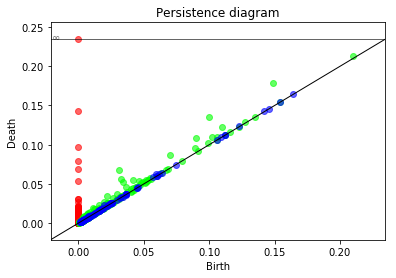

In [99]:
gudhi.plot_persistence_diagram(diagA_alpha[0])

> # <span style="color:blue">Question 3</span>: Matrices of pairwise bottleneck distances between diagrams


__Matrices of pairwise bottleneck distances between diagrams and use a dimensionality reduction algorithm to visualize them in 2D and 3D (e.g. Multidimensional Scaling).__



### Pair of (birth , death) tuple

In [248]:
def buildCleanPair(diagram):
    return [item[1] for item in diagram if not np.isinf(item[1][1])] 

> ## with 0-persitent diagram

In [249]:
diagA_0_pairs=[buildCleanPair(diag) for diag in diagA_0] 
diagB_0_pairs=[buildCleanPair(diag) for diag in diagB_0] 
diagC_0_pairs=[buildCleanPair(diag) for diag in diagC_0] 

> ## with 1-persitent diagram

In [250]:
diagA_1_pairs=[buildCleanPair(diag) for diag in diagA_1] 
diagB_1_pairs=[buildCleanPair(diag) for diag in diagB_1] 
diagC_1_pairs=[buildCleanPair(diag) for diag in diagC_1]

> ## with alpha complex based diagram

In [251]:
diagA_alpha_pairs=[buildCleanPair(diag) for diag in diagA_alpha] 
diagB_alpha_pairs=[buildCleanPair(diag) for diag in diagB_alpha] 
diagC_alpha_pairs=[buildCleanPair(diag) for diag in diagC_alpha]

## The function below compute the bootleneck distance between two persistent diagrams

In [252]:
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

In [253]:
def computeMatrixBottleneckDistance(diagList1):
    matrix=np.zeros((len(diagList1),len(diagList1)))
    for i in range(len(diagList1)):
        for j in range(i,len(diagList1)):
            dist=gudhi.bottleneck_distance(diagList1[i], diagList1[j], 0.0001)
            matrix[i,j]=dist
            matrix[j,i]=dist
    return matrix

> ## With 0-persistent homology

In [254]:
matrix_bottleneck_distance_All_0=computeMatrixBottleneckDistance(diagA_0_pairs+diagB_0_pairs+diagC_0_pairs)

### (2D) plot Pedestrian A,B and C  

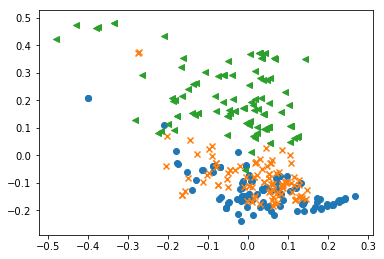

In [255]:
mds2 = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos2d= mds2.fit(matrix_bottleneck_distance_All_0).embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    pos2d[:100, 0], pos2d[:100, 1], marker = 'o'
    )
plt.scatter(
    pos2d[100:200, 0], pos2d[100:200, 1], marker = 'x'
    )
plt.scatter(
    pos2d[200:300, 0], pos2d[200:300, 1], marker = '<'
    )
plt.show()


### (3D) plot Pedestrian A,B and C

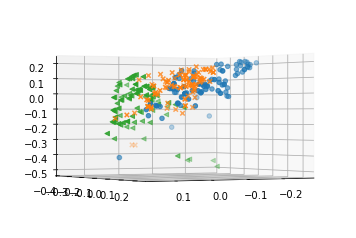

In [256]:
mds3 = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos3d= mds3.fit(matrix_bottleneck_distance_All_0).embedding_


plt.subplots_adjust(bottom = 0.1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=60,elev = 0)
ax.scatter(
    pos3d[:100, 0], pos3d[:100, 1],pos3d[:100, 2], marker = 'o'
    )
ax.scatter(
    pos3d[100:200, 0], pos3d[100:200, 1],pos3d[100:200, 2], marker = 'x'
    )
ax.scatter(
    pos3d[200:300, 0], pos3d[200:300, 1],pos3d[200:300, 2], marker = '<'
    )
plt.show()



> ## With 1-persistent homology

In [257]:
matrix_bottleneck_distance_All_1=computeMatrixBottleneckDistance(diagA_1_pairs+diagB_1_pairs+diagC_1_pairs)

### (2D) plot Pedestrian A,B and C

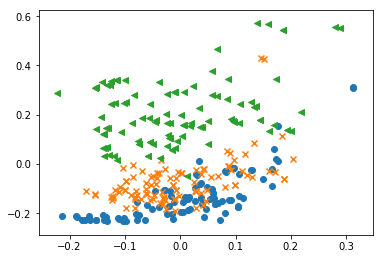

In [258]:
mds2 = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos2d= mds2.fit(matrix_bottleneck_distance_All_1).embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    pos2d[:100, 0], pos2d[:100, 1], marker = 'o'
    )
plt.scatter(
    pos2d[100:200, 0], pos2d[100:200, 1], marker = 'x'
    )
plt.scatter(
    pos2d[200:300, 0], pos2d[200:300, 1], marker = '<'
    )
plt.show()



### (3D) plot Pedestrian A,B and C

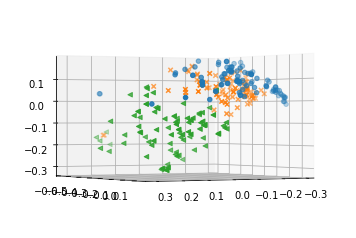

In [259]:
mds3 = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos3d= mds3.fit(matrix_bottleneck_distance_All_1).embedding_


plt.subplots_adjust(bottom = 0.1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=60,elev = 0)
ax.scatter(
    pos3d[:100, 0], pos3d[:100, 1],pos3d[:100, 2], marker = 'o'
    )
ax.scatter(
    pos3d[100:200, 0], pos3d[100:200, 1],pos3d[100:200, 2], marker = 'x'
    )
ax.scatter(
    pos3d[200:300, 0], pos3d[200:300, 1],pos3d[200:300, 2], marker = '<'
    )
plt.show()

> ## With alpha complex

In [260]:
matrix_bottleneck_distance_All_alpha=computeMatrixBottleneckDistance(diagA_alpha_pairs+diagB_alpha_pairs+diagC_alpha_pairs)

### (2D) plot Pedestrian A,B and C

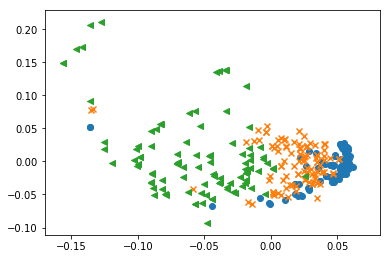

In [261]:
mds2 = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos2d= mds2.fit(matrix_bottleneck_distance_All_alpha).embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    pos2d[:100, 0], pos2d[:100, 1], marker = 'o'
    )
plt.scatter(
    pos2d[100:200, 0], pos2d[100:200, 1], marker = 'x'
    )
plt.scatter(
    pos2d[200:300, 0], pos2d[200:300, 1], marker = '<'
    )
plt.show()


### (3D) Pedestrian A,B and C

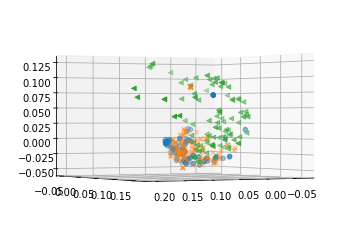

In [262]:
mds3 = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos3d= mds3.fit(matrix_bottleneck_distance_All_alpha).embedding_


plt.subplots_adjust(bottom = 0.1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=60,elev = 0)
ax.scatter(
    pos3d[:100, 0], pos3d[:100, 1],pos3d[:100, 2], marker = 'o'
    )
ax.scatter(
    pos3d[100:200, 0], pos3d[100:200, 1],pos3d[100:200, 2], marker = 'x'
    )
ax.scatter(
    pos3d[200:300, 0], pos3d[200:300, 1],pos3d[200:300, 2], marker = '<'
    )
plt.show()

> # <span style="color:blue">Question 4</span> : Computing persistence landscape


__This function should take as input a persistence
diagram dgm (in the Gudhi format), a dimension k, the endpoints xmin, xmax of an interval, the
number nb_nodes of nodes of a regular grid on the interval [xmin, xmax] and a number of landscapes
nb_ld, and output a nbld × nbnodes array storing the values of the first nb_ld landscapes of dgm on the
node of the grid. Check, on some simple examples that your code is correct.__

In [263]:
def computeLandscapes(dgm,x_min,x_max,nb_nodes,nb_lbd,k=-1):
    ''' This function compute the landscape of a persistent diagram. 
    Given a range [xmin,xmax] ,and a grid size (a number of nodes and number of landscapes)'''
    if k==-1:
        print("take all dimension in the diagram")
        diagram=buildCleanPair(dgm)
    else: 
        diagram=[elet[1] for elet in dgm if elet[0]==k ]
        
    output = np.zeros((nb_lbd,nb_nodes))
    step = (x_max - x_min) / nb_nodes
    for i in range(nb_nodes):
        x = x_min + i * step
        event_list = []
        for tup in diagram:
            b = tup[0]
            d = tup[1]
            if (b <= x) and (x<= d):
                if x >= (d+b)/2. :
                    event_list.append((d-x))
                else:
                    event_list.append((x-b))
        event_list.sort(reverse=True)
        event_list = np.asarray(event_list)
        for j in range(nb_lbd):
            if(j<len(event_list)):
                output[j,i]=event_list[j]
    return output

> Example

### Computing the landscape for first instance of pedestrian A uisng k=0

In [264]:
computeLandscapes(diagA_1[0],0,15,400,5,0)

array([[ 0.    ,  0.0375,  0.075 , ..., 14.8875, 14.925 , 14.9625],
       [ 0.    ,  0.0375,  0.075 , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.0375,  0.075 , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.0375,  0.075 , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.0375,  0.075 , ...,  0.    ,  0.    ,  0.    ]])

> # <span style="color:blue">Question 5</span>: First 5 landscapes on a relevant interval with a few hundred of nodes 




## Selection of the relevant interval for the persistence landscapes

In building the persistence landscape for 0 and 1 persitent diagrams, a relevant interval would include all the 

### 0_Persistent -Pedestrian A, B and C

In [265]:
minimum_birth_A_0 = []

for i in range(len(diagA_0_pairs)):
    temp_list = []
    for j in range(len(diagA_0_pairs[i])):
        temp_list.append(diagA_0_pairs[i][j][0])
    minimum_birth_A_0.append(min(temp_list))
min_b_A_0 = min(minimum_birth_A_0)

maximum_death_A_0 = []

for i in range(len(diagA_0_pairs)):
    temp_list = []
    temp_clean = []
    for j in range(len(diagA_0_pairs[i])):
        temp_list.append(diagA_0_pairs[i][j][1])
        if np.isinf(temp_list[j]) == False:
            temp_clean.append(temp_list[j])
    maximum_death_A_0.append(max(temp_clean))
max_d_A_0 = max(maximum_death_A_0)

#####################################################################
minimum_birth_B_0 = []

for i in range(len(diagB_0_pairs)):
    temp_list = []
    for j in range(len(diagB_0_pairs[i])):
        temp_list.append(diagB_0_pairs[i][j][0])
    minimum_birth_B_0.append(min(temp_list))
min_b_B_0 = min(minimum_birth_B_0)

maximum_death_B_0 = []

for i in range(len(diagB_0_pairs)):
    temp_list = []
    temp_clean = []
    for j in range(len(diagB_0_pairs[i])):
        temp_list.append(diagB_0_pairs[i][j][1])
        if np.isinf(temp_list[j]) == False:
            temp_clean.append(temp_list[j])
    maximum_death_B_0.append(max(temp_clean))
max_d_B_0 = max(maximum_death_B_0)

######################################################################
minimum_birth_C_0 = []

for i in range(len(diagC_0_pairs)):
    temp_list = []
    for j in range(len(diagC_0_pairs[i])):
        temp_list.append(diagC_0_pairs[i][j][0])
    minimum_birth_C_0.append(min(temp_list))
min_b_C_0 = min(minimum_birth_B_0)

maximum_death_C_0 = []

for i in range(len(diagC_0_pairs)):
    temp_list = []
    temp_clean = []
    for j in range(len(diagC_0_pairs[i])):
        temp_list.append(diagC_0_pairs[i][j][1])
        if np.isinf(temp_list[j]) == False:
            temp_clean.append(temp_list[j])
    maximum_death_C_0.append(max(temp_clean))
max_d_C_0 = max(maximum_death_C_0)

In [266]:
print("max death A",max_d_A_0)
print("min birth A", min_b_A_0)
print("max death B",max_d_B_0)
print("min birth B", min_b_B_0)
print("max death C",max_d_C_0)
print("min birth C", min_b_C_0)

max death A 1.2090181819989314
min birth A 0.0
max death B 1.2415407826398615
min birth B 0.0
max death C 1.4692886206862146
min birth C 0.0


### 1_Persistent -Pedestrian A, B and C

In [267]:
minimum_birth_A_1 = []

for i in range(len(diagA_1_pairs)):
    temp_list = []
    for j in range(len(diagA_1_pairs[i])):
        temp_list.append(diagA_1_pairs[i][j][0])
    minimum_birth_A_1.append(min(temp_list))
min_b_A_1 = min(minimum_birth_A_1)

maximum_death_A_1 = []

for i in range(len(diagA_1_pairs)):
    temp_list = []
    temp_clean = []
    for j in range(len(diagA_1_pairs[i])):
        temp_list.append(diagA_1_pairs[i][j][1])
        if np.isinf(temp_list[j]) == False:
            temp_clean.append(temp_list[j])
    maximum_death_A_1.append(max(temp_clean))
max_d_A_1 = max(maximum_death_A_1)

#########################################################################
minimum_birth_B_1 = []

for i in range(len(diagB_1_pairs)):
    temp_list = []
    for j in range(len(diagB_1_pairs[i])):
        temp_list.append(diagB_1_pairs[i][j][0])
    minimum_birth_B_1.append(min(temp_list))
min_b_B_1 = min(minimum_birth_B_1)

maximum_death_B_1 = []

for i in range(len(diagB_1_pairs)):
    temp_list = []
    temp_clean = []
    for j in range(len(diagB_1_pairs[i])):
        temp_list.append(diagB_1_pairs[i][j][1])
        if np.isinf(temp_list[j]) == False:
            temp_clean.append(temp_list[j])
    maximum_death_B_1.append(max(temp_clean))
max_d_B_1 = max(maximum_death_B_1)
##################################################################
minimum_birth_C_1 = []

for i in range(len(diagC_1_pairs)):
    temp_list = []
    for j in range(len(diagC_1_pairs[i])):
        temp_list.append(diagC_1_pairs[i][j][0])
    minimum_birth_C_1.append(min(temp_list))
min_b_C_1 = min(minimum_birth_C_1)

maximum_death_C_1 = []

for i in range(len(diagC_1_pairs)):
    temp_list = []
    temp_clean = []
    for j in range(len(diagC_1_pairs[i])):
        temp_list.append(diagC_1_pairs[i][j][1])
        if np.isinf(temp_list[j]) == False:
            temp_clean.append(temp_list[j])
    maximum_death_C_1.append(max(temp_clean))
max_d_C_1 = max(maximum_death_C_1)

In [268]:
print("max death A",max_d_A_1)
print("min birth A", min_b_A_1)
print("max death B",max_d_B_1)
print("min birth B", min_b_B_1)
print("max death C",max_d_C_1)
print("min birth C", min_b_C_1)

max death A 1.2090181819989314
min birth A 0.0
max death B 1.2415407826398615
min birth B 0.0
max death C 1.6080124994483087
min birth C 0.0


### Set parameter for the landscape computation

As we are asked in the instructions, we choose the parameter below for the persistence landscapes constructions.

In [269]:
epsilon=0.2
x_min=min(min(min_b_A_0,min_b_B_0,min_b_C_0),min(min_b_A_1,min_b_B_1,min_b_C_1))-epsilon
x_max=max(max(max_d_A_0,max_d_B_0,max_d_C_0),max(max_d_A_1,max_d_B_1,max_d_C_1))+epsilon
nb_nodes=300
nb_lbd=5

## Random Forest

In [270]:
"""
Created on Sun Dec 17 18:33:31 2017

@author: Fredreci Chazal - All rights reserved
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Classification with random forests 
#### Interesting compare with L0_list, L1_list and L_list
#### where L0_list, L1_list and L_list are list storing the $0$-dimensional 
#### landscapes, $1$-dimensional landscapes, and the concatenation of both 
#### respectively

In [271]:
def buildFeatures(landscapesA,landscapesB,landscapesC):
    ''' This function prepare the dataset that is needed to feed the random forest algorithm'''
    A=[el.flatten() for el in landscapesA]
    B=[el.flatten() for el in landscapesB]
    C=[el.flatten() for el in landscapesC]
    List=A+B+C
    return List

In [272]:
def runRFandPlot(List):
    avg = 0
    for i in range(20):
        L_train, L_test, label_train, label_test = train_test_split(List, label, test_size=0.2)
        RF = RandomForestClassifier()
        RF.fit(L_train, label_train)
        print(np.mean(RF.predict(L_test) == label_test) )
        avg += np.mean(RF.predict(L_test) == label_test)
        #print(confusion_matrix(RF.predict(L_test), label_test))
    print ("avg pred: ",avg/20)

    plt.plot(RF.feature_importances_)

## Testing the classifier and Persistence Landscapes graphs

In the part below, we compute the persistence landscapes of:
- The 0-persistent diagram (k equals 0 and 1), 
- The 1-persistent diagram (k equals 0, 1 and 2) 
- The alpha shape diagram (k equals 0, 1 and 2)

For each of the above, we run a random forest classifier and record the accuracy in predicting the pedestrian task. We will also plot the average persistence landscapes computed for the dataset giving the best results.

> ### with 0-persitent diagram: 

- __0-dimensional persisitence landscapes__

In [273]:
diagA_0_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagA_0]
diagB_0_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagB_0]
diagC_0_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagC_0]

In [274]:
averageA_0_landscapes_0=sum(diagA_0_landscapes_0)/len(diagA_0_landscapes_0)
averageB_0_landscapes_0=sum(diagB_0_landscapes_0)/len(diagB_0_landscapes_0)
averageC_0_landscapes_0=sum(diagC_0_landscapes_0)/len(diagC_0_landscapes_0)

> #### Running the random forest classifier 

0.9
0.8
0.9
0.7333333333333333
0.8666666666666667
0.9166666666666666
0.8833333333333333
0.9166666666666666
0.7666666666666667
0.8333333333333334
0.8666666666666667
0.8166666666666667
0.8333333333333334
0.8
0.8166666666666667
0.7833333333333333
0.95
0.75
0.9333333333333333
0.8666666666666667
avg pred:  0.8466666666666667


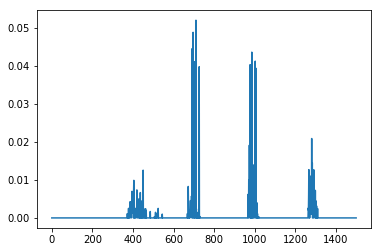

In [278]:
List=buildFeatures(diagA_0_landscapes_0,diagB_0_landscapes_0,diagC_0_landscapes_0)
runRFandPlot(List)

 __1-dimensional landscapes__

In [279]:
diagA_0_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagA_0]
diagB_0_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagB_0]
diagC_0_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagC_0]

In [280]:
averageA_0_landscapes_1=sum(diagA_0_landscapes_1)/len(diagA_0_landscapes_1)
averageB_0_landscapes_1=sum(diagB_0_landscapes_1)/len(diagB_0_landscapes_1)
averageC_0_landscapes_1=sum(diagC_0_landscapes_1)/len(diagC_0_landscapes_1)

> #### Running the random forest classifier 

0.95
0.8833333333333333
0.9333333333333333
0.9
0.8666666666666667
0.8666666666666667
0.9
0.9333333333333333
0.8833333333333333
0.9166666666666666
0.8833333333333333
0.9166666666666666
0.9166666666666666
0.9333333333333333
0.9166666666666666
0.9166666666666666
0.9666666666666667
0.95
0.9166666666666666
0.8833333333333333
avg pred:  0.9116666666666665


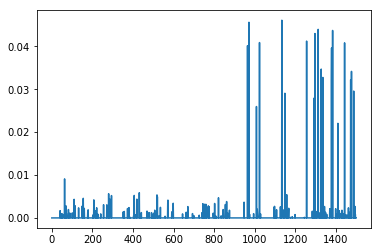

In [287]:
List=buildFeatures(diagA_0_landscapes_1,diagB_0_landscapes_1,diagC_0_landscapes_1)
runRFandPlot(List)

> ### with 1-persitent diagram

- __0-dimensional landscapes__

In [288]:
diagA_1_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagA_1]
diagB_1_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagB_1]
diagC_1_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagC_1]

In [289]:
averageA_1_landscapes_0=sum(diagA_1_landscapes_0)/len(diagA_1_landscapes_0)
averageB_1_landscapes_0=sum(diagB_1_landscapes_0)/len(diagB_1_landscapes_0)
averageC_1_landscapes_0=sum(diagC_1_landscapes_0)/len(diagC_1_landscapes_0)

> #### Running the random forest classifier 

0.85
0.8666666666666667
0.8166666666666667
0.8166666666666667
0.7833333333333333
0.7833333333333333
0.8166666666666667
0.8333333333333334
0.8
0.8
0.7666666666666667
0.8
0.8666666666666667
0.8333333333333334
0.8333333333333334
0.9166666666666666
0.8833333333333333
0.8666666666666667
0.9
0.8
avg pred:  0.8316666666666668


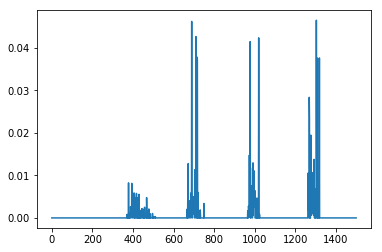

In [293]:
List=buildFeatures(diagA_1_landscapes_0,diagB_1_landscapes_0,diagC_1_landscapes_0)
runRFandPlot(List)

- __1-dimensional landscapes__

In [294]:
diagA_1_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagA_1]
diagB_1_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagB_1]
diagC_1_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagC_1]

In [295]:
averageA_1_landscapes_1=sum(diagA_1_landscapes_1)/len(diagA_1_landscapes_1)
averageB_1_landscapes_1=sum(diagB_1_landscapes_1)/len(diagB_1_landscapes_1)
averageC_1_landscapes_1=sum(diagC_1_landscapes_1)/len(diagC_1_landscapes_1)

> #### Running the random forest classifier 

0.95
0.9666666666666667
1.0
0.9833333333333333
1.0
1.0
1.0
0.9833333333333333
1.0
0.95
0.9833333333333333
0.9833333333333333
0.9833333333333333
1.0
1.0
1.0
0.9666666666666667
0.9833333333333333
0.9833333333333333
1.0
avg pred:  0.9858333333333332


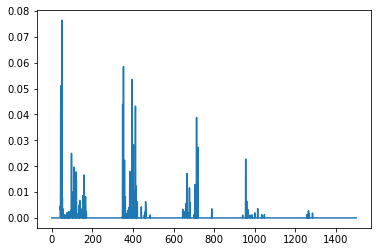

In [299]:
List=buildFeatures(diagA_1_landscapes_1,diagB_1_landscapes_1,diagC_1_landscapes_1)
runRFandPlot(List)

- __2-dimensional landscapes__

In [300]:
diagA_1_landscapes_2=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,2) for elet in diagA_1]
diagB_1_landscapes_2=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,2) for elet in diagB_1]
diagC_1_landscapes_2=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,2) for elet in diagC_1]

In [301]:
averageA_1_landscapes_2=sum(diagA_1_landscapes_2)/len(diagA_1_landscapes_2)
averageB_1_landscapes_2=sum(diagB_1_landscapes_2)/len(diagB_1_landscapes_2)
averageC_1_landscapes_2=sum(diagC_1_landscapes_2)/len(diagC_1_landscapes_2)

> #### Running the random forest classifier 

0.26666666666666666
0.2833333333333333
0.26666666666666666
0.3
0.3
0.3333333333333333
0.3
0.25
0.3
0.2833333333333333
0.23333333333333334
0.3
0.3333333333333333
0.31666666666666665
0.31666666666666665
0.2833333333333333
0.3
0.2833333333333333
0.3
0.3333333333333333
avg pred:  0.2941666666666666


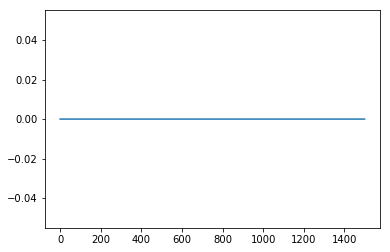

In [342]:
List=buildFeatures(diagA_1_landscapes_2,diagB_1_landscapes_2,diagC_1_landscapes_2)
runRFandPlot(List)

> ### with alpha complex diagram

- __0-dimensional landscapes__

In [306]:
diagA_alpha_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagA_alpha]
diagB_alpha_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagB_alpha]
diagC_alpha_landscapes_0=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,0) for elet in diagC_alpha]

In [307]:
averageA_alpha_landscapes_0=sum(diagA_alpha_landscapes_0)/len(diagA_alpha_landscapes_0)
averageB_alpha_landscapes_0=sum(diagB_alpha_landscapes_0)/len(diagB_alpha_landscapes_0)
averageC_alpha_landscapes_0=sum(diagC_alpha_landscapes_0)/len(diagC_alpha_landscapes_0)

> #### Running the random forest classifier 

0.8166666666666667
0.8
0.8666666666666667
0.9
0.8
0.9166666666666666
0.8166666666666667
0.7833333333333333
0.8333333333333334
0.9
0.9333333333333333
0.9
0.8833333333333333
0.95
0.8833333333333333
0.9
0.8833333333333333
0.8333333333333334
0.9
0.8833333333333333
avg pred:  0.8691666666666666


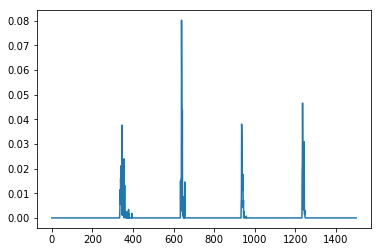

In [311]:
List=buildFeatures(diagA_alpha_landscapes_0,diagB_alpha_landscapes_0,diagC_alpha_landscapes_0)
runRFandPlot(List)

- __1-dimensional landscapes__

In [312]:
diagA_alpha_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagA_alpha]
diagB_alpha_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagB_alpha]
diagC_alpha_landscapes_1=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,1) for elet in diagC_alpha]

In [340]:
averageA_alpha_landscapes_1=sum(diagA_alpha_landscapes_1)/len(diagA_alpha_landscapes_1)
averageB_alpha_landscapes_1=sum(diagB_alpha_landscapes_1)/len(diagB_alpha_landscapes_1)
averageC_alpha_landscapes_1=sum(diagC_alpha_landscapes_1)/len(diagC_alpha_landscapes_1)


> #### Running the random forest classifier 

1.0
0.95
1.0
1.0
0.9666666666666667
0.9833333333333333
1.0
0.9833333333333333
0.9833333333333333
1.0
0.9833333333333333
0.95
1.0
0.9333333333333333
1.0
0.9833333333333333
0.9833333333333333
0.9833333333333333
0.9666666666666667
0.9333333333333333
avg pred:  0.9791666666666666


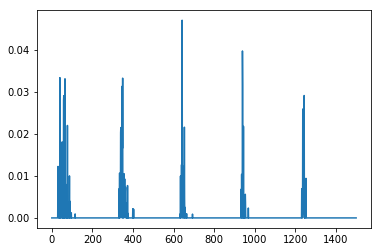

In [317]:
List=buildFeatures(diagA_alpha_landscapes_1,diagB_alpha_landscapes_1,diagC_alpha_landscapes_1)
runRFandPlot(List)

- __2-dimensional landscapes__

In [318]:
diagA_alpha_landscapes_2=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,2) for elet in diagA_alpha]
diagB_alpha_landscapes_2=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,2) for elet in diagB_alpha]
diagC_alpha_landscapes_2=[computeLandscapes(elet,x_min,x_max,nb_nodes,nb_lbd,2) for elet in diagC_alpha]

In [343]:
averageA_alpha_landscapes_2=sum(diagA_alpha_landscapes_2)/len(diagA_alpha_landscapes_2)
averageB_alpha_landscapes_2=sum(diagB_alpha_landscapes_2)/len(diagB_alpha_landscapes_2)
averageC_alpha_landscapes_2=sum(diagC_alpha_landscapes_2)/len(diagC_alpha_landscapes_2)


> #### Running the random forest classifier 

0.8833333333333333
0.7166666666666667
0.8
0.8166666666666667
0.8
0.7166666666666667
0.7666666666666667
0.9333333333333333
0.85
0.85
0.8666666666666667
0.8666666666666667
0.7333333333333333
0.8666666666666667
0.8833333333333333
0.8
0.7833333333333333
0.7833333333333333
0.8666666666666667
0.9
avg pred:  0.8241666666666667


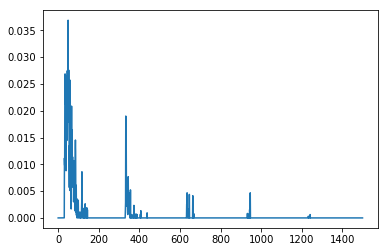

In [323]:
List=buildFeatures(diagA_alpha_landscapes_2,diagB_alpha_landscapes_2,diagC_alpha_landscapes_2)
runRFandPlot(List)

> ## With 0-persitent and 1-persitent concatenated

We pick the best persitence landscapes of 0 and 1 persitent diagram and we concatenate them in order to build a new dataset

In [324]:
lA=[np.array(list(el.flatten()) +list(el2.flatten())) for el,el2 in zip(diagA_0_landscapes_1,diagA_1_landscapes_1)]
lB=[np.array(list(el.flatten()) +list(el2.flatten())) for el,el2 in zip(diagB_0_landscapes_1,diagB_1_landscapes_1)]
lC=[np.array(list(el.flatten()) +list(el2.flatten())) for el,el2 in zip(diagC_0_landscapes_1,diagC_1_landscapes_1)]
L_list=lA+lB+lC

0.9166666666666666
0.9833333333333333
0.9666666666666667
0.9833333333333333
0.9833333333333333
0.9833333333333333
0.9166666666666666
0.9666666666666667
0.9833333333333333
1.0
1.0
0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9833333333333333
0.95
0.9666666666666667
0.9166666666666666
0.95
avg pred:  0.9641666666666666


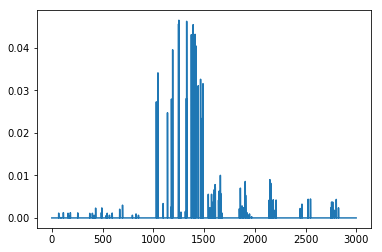

In [325]:
runRFandPlot(L_list)

### Average Persistence Landscape visualization 

We want to visualize the average persistence landscapes of the 3 pedestrians. We will restrict ourselves to the two best dataset.

> ##### With 1-dimensional persitence landscapes build with the 1-dimensional persistence diagram

In [349]:
averageA_1_landscapes_1_av=np.mean(averageA_1_landscapes_1,axis=0)
averageA_1_landscapes_1_std=np.std(averageA_1_landscapes_1,axis=0)
averageB_1_landscapes_1_av=np.mean(averageB_1_landscapes_1,axis=0)
averageB_1_landscapes_1_std=np.std(averageB_1_landscapes_1,axis=0)
averageC_1_landscapes_1_av=np.mean(averageC_1_landscapes_1,axis=0)
averageC_1_landscapes_1_std=np.std(averageC_1_landscapes_1,axis=0)

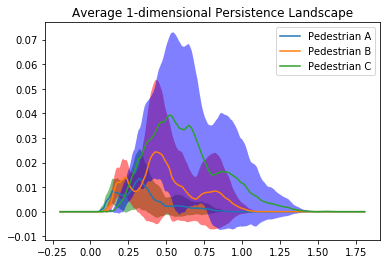

In [355]:
plt.plot(np.linspace(x_min,x_max, num=nb_nodes),averageA_1_landscapes_1_av.transpose())
plt.fill_between(np.linspace(x_min,x_max, num=nb_nodes), averageA_1_landscapes_1_av.transpose()-averageA_1_landscapes_1_std.transpose(), averageA_1_landscapes_1_av.transpose()+averageA_1_landscapes_1_std.transpose(),facecolor='green',alpha=0.5)

plt.plot(np.linspace(x_min,x_max, num=nb_nodes),averageB_1_landscapes_1_av.transpose())
plt.fill_between(np.linspace(x_min,x_max, num=nb_nodes), averageB_1_landscapes_1_av.transpose()-averageB_1_landscapes_1_std.transpose(), averageB_1_landscapes_1_av.transpose()+averageB_1_landscapes_1_std.transpose(),facecolor='red',alpha=0.5)

plt.plot(np.linspace(x_min,x_max, num=nb_nodes),averageC_1_landscapes_1_av.transpose())
plt.fill_between(np.linspace(x_min,x_max, num=nb_nodes), averageC_1_landscapes_1_av.transpose()-averageC_1_landscapes_1_std.transpose(), averageC_1_landscapes_1_av.transpose()+averageC_1_landscapes_1_std.transpose(),facecolor='blue',alpha=0.5)

plt.legend(("Pedestrian A", "Pedestrian B","Pedestrian C"),loc="upper right")
plt.title("Average 1-dimensional Persistence Landscape")

> ##### With 1-dimensional persitence landscapes build with the alpha shape persistence diagram

In [351]:
averageA_alpha_landscapes_1_av=np.mean(averageA_alpha_landscapes_1,axis=0)
averageA_alpha_landscapes_1_std=np.std(averageA_alpha_landscapes_1,axis=0)
averageB_alpha_landscapes_1_av=np.mean(averageB_alpha_landscapes_1,axis=0)
averageB_alpha_landscapes_1_std=np.std(averageB_alpha_landscapes_1,axis=0)
averageC_alpha_landscapes_1_av=np.mean(averageC_alpha_landscapes_1,axis=0)
averageC_alpha_landscapes_1_std=np.std(averageC_alpha_landscapes_1,axis=0)

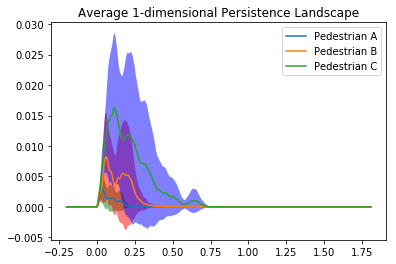

In [356]:
plt.plot(np.linspace(x_min,x_max, num=nb_nodes),averageA_alpha_landscapes_1_av.transpose())
plt.fill_between(np.linspace(x_min,x_max, num=nb_nodes), averageA_alpha_landscapes_1_av.transpose()-averageA_alpha_landscapes_1_std.transpose(), averageA_alpha_landscapes_1_av.transpose()+averageA_alpha_landscapes_1_std.transpose(),facecolor='green',alpha=0.5)

plt.plot(np.linspace(x_min,x_max, num=nb_nodes),averageB_alpha_landscapes_1_av.transpose())
plt.fill_between(np.linspace(x_min,x_max, num=nb_nodes), averageB_alpha_landscapes_1_av.transpose()-averageB_alpha_landscapes_1_std.transpose(), averageB_alpha_landscapes_1_av.transpose()+averageB_alpha_landscapes_1_std.transpose(),facecolor='red',alpha=0.5)

plt.plot(np.linspace(x_min,x_max, num=nb_nodes),averageC_alpha_landscapes_1_av.transpose())
plt.fill_between(np.linspace(x_min,x_max, num=nb_nodes), averageC_alpha_landscapes_1_av.transpose()-averageC_alpha_landscapes_1_std.transpose(), averageC_alpha_landscapes_1_av.transpose()+averageC_alpha_landscapes_1_std.transpose(),facecolor='blue',alpha=0.5)

plt.legend(("Pedestrian A", "Pedestrian B","Pedestrian C"),loc="upper right")
plt.title("Average 1-dimensional Persistence Landscape")

> ## Best 1-Persitent Landscapes with Grid Search

In [326]:
# Define a scoring fonction to evaluate modelling
from sklearn.cross_validation import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [328]:
### Use GridSearchCV to tune parameters for Random Forest
# turn run_gs to True if you want to run the gridsearch again.
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

List=buildFeatures(diagA_1_landscapes_1,diagB_1_landscapes_1,diagC_1_landscapes_1)
#runRFandPlot(List)

train=List
targets=label

run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8, None],
                 'n_estimators': [10, 20, 50, 100],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10,30, 50],
                 'min_samples_leaf': [1, 3, 10, 30, 50],
                 'bootstrap': [True, False],
                 'criterion': ['gini', 'entropy']
                 }
    rf = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(rf,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)
    # Input the label of the training set and the related targets
    grid_search.fit(train, targets)
    rf_best = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    # **parameters enables to retrieve the optimal parameters derived from GridSearchCV
    rf_best = RandomForestClassifier(**parameters)
    
    # Again, input the correct names for the training set and its related target variables
    rf_best.fit(train, targets)
    
compute_score(rf_best, train, targets, scoring='accuracy')

0.9966666666666667

> ## Alpha shape  with Grid Search

In [329]:
### Use GridSearchCV to tune parameters for Random Forest
# turn run_gs to True if you want to run the gridsearch again.
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

List=buildFeatures(diagA_alpha_landscapes_1,diagB_alpha_landscapes_1,diagC_alpha_landscapes_1)

train=List
targets=label

run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8, None],
                 'n_estimators': [10, 20, 50, 100],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10,30, 50],
                 'min_samples_leaf': [1, 3, 10, 30, 50],
                 'bootstrap': [True, False],
                 'criterion': ['gini', 'entropy']
                 }
    rf = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(rf,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)
    # Input the label of the training set and the related targets
    grid_search.fit(train, targets)
    rf_best = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    # **parameters enables to retrieve the optimal parameters derived from GridSearchCV
    rf_best = RandomForestClassifier(**parameters)
    
    # Again, input the correct names for the training set and its related target variables
    rf_best.fit(train, targets)
    
compute_score(rf_best, train, targets, scoring='accuracy')

0.9966666666666667

> # <span style="color:blue">Question 6</span>: Classification using raw data



### __Do the same experiment as previously, but using the raw data ( 3 × 200 array of acceleration coordinates).__

In [65]:
l1A=[el.T.flatten() for el in data_A]
l1B=[el.T.flatten() for el in data_B]
l1C=[el.T.flatten() for el in data_C]
L1_list_row=l1A+l1B+l1C

0.8833333333333333
0.9333333333333333
0.8333333333333334
0.9
0.95
0.9333333333333333
0.9166666666666666
0.9
0.8333333333333334
0.8
0.9333333333333333
0.9333333333333333
0.8333333333333334
0.8666666666666667
0.8833333333333333
0.9
0.9666666666666667
0.9333333333333333
0.9166666666666666
0.8833333333333333
avg pred:  0.8966666666666668


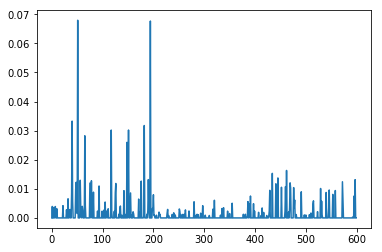

In [106]:
runRFandPlot(L1_list_row)